**This notebook illustrates the training methodology for image classification, employing a strategy called 'training by epochs'. This approach involves initially training the model on a portion of the dataset and then fine-tuning it on the remaining data. The process aims to optimize the model's understanding of the data through iterative refinement. Notably, this specific notebook delves into the insights gained during the last part of the training phase.**

**Importing necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import os, zipfile, re, cv2, glob
import tensorflow
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


**In the last part, we will resize the next 500 images of each of the four classes, save them in a folder named 'resized-images-4', and re-train the third partially trained model on them.**

**Resizing images of the first class and saving them in drive**

In [ ]:
original_folder = '/content/drive/MyDrive/image-classification/original-images/a/'
resized_folder = '/content/drive/MyDrive/image-classification/resized-images-4/'

os.makedirs(resized_folder, exist_ok=True)

start_index = 1500
end_index = 1999

original_folder_name = os.path.basename(os.path.normpath(original_folder))

for i, filename in enumerate(os.listdir(original_folder)[start_index:end_index + 1]):
    img_path = os.path.join(original_folder, filename)

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    base, ext = os.path.splitext(filename)

    if not ext:
        print(f"Skipped {filename} - no valid extension")
        continue

    new_filename = f"{original_folder_name}{i + 1}.jpg"

    new_img_path = os.path.join(resized_folder, new_filename)

    img.save(new_img_path, format='JPEG')

**Counting the number of resized images**

In [ ]:
path, dirs, files = next(os.walk(resized_folder))
file_count = len(files)
print('Total number of resized images: ', file_count)

Total number of resized images:  500


**Resizing images of the second class and saving them in drive**

In [ ]:
original_folder = '/content/drive/MyDrive/image-classification/original-images/b/'
resized_folder = '/content/drive/MyDrive/image-classification/resized-images-4/'

os.makedirs(resized_folder, exist_ok=True)

start_index = 1500
end_index = 1999

original_folder_name = os.path.basename(os.path.normpath(original_folder))

for i, filename in enumerate(os.listdir(original_folder)[start_index:end_index + 1]):
    img_path = os.path.join(original_folder, filename)

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    base, ext = os.path.splitext(filename)

    if not ext:
        print(f"Skipped {filename} - no valid extension")
        continue

    new_filename = f"{original_folder_name}{i + 1}.jpg"

    new_img_path = os.path.join(resized_folder, new_filename)

    img.save(new_img_path, format='JPEG')

**Counting the number of resized images till now**

In [ ]:
path, dirs, files = next(os.walk(resized_folder))
file_count = len(files)
print('Total number of resized images: ', file_count)

Total number of resized images:  1000


**Resizing images of the third class and saving them in drive**

In [ ]:
original_folder = '/content/drive/MyDrive/image-classification/original-images/c/'
resized_folder = '/content/drive/MyDrive/image-classification/resized-images-4/'

os.makedirs(resized_folder, exist_ok=True)

start_index = 1500
end_index = 1999

original_folder_name = os.path.basename(os.path.normpath(original_folder))

for i, filename in enumerate(os.listdir(original_folder)[start_index:end_index + 1]):
    img_path = os.path.join(original_folder, filename)

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    base, ext = os.path.splitext(filename)

    if not ext:
        print(f"Skipped {filename} - no valid extension")
        continue

    new_filename = f"{original_folder_name}{i + 1}.jpg"

    new_img_path = os.path.join(resized_folder, new_filename)

    img.save(new_img_path, format='JPEG')

**Counting the number of resized images till now**

In [ ]:
path, dirs, files = next(os.walk(resized_folder))
file_count = len(files)
print('Total number of resized images: ', file_count)

Total number of resized images:  1500


**Resizing images of the fourth class and saving them in drive**

In [ ]:
original_folder = '/content/drive/MyDrive/image-classification/original-images/d/'
resized_folder = '/content/drive/MyDrive/image-classification/resized-images-4/'

os.makedirs(resized_folder, exist_ok=True)

start_index = 1500
end_index = 1999

original_folder_name = os.path.basename(os.path.normpath(original_folder))

for i, filename in enumerate(os.listdir(original_folder)[start_index:end_index + 1]):
    img_path = os.path.join(original_folder, filename)

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    base, ext = os.path.splitext(filename)

    if not ext:
        print(f"Skipped {filename} - no valid extension")
        continue

    new_filename = f"{original_folder_name}{i + 1}.jpg"

    new_img_path = os.path.join(resized_folder, new_filename)

    img.save(new_img_path, format='JPEG')

**Counting the number of total resized images**

In [ ]:
path, dirs, files = next(os.walk(resized_folder))
file_count = len(files)
print('Total number of resized images: ', file_count)

Total number of resized images:  2000


**Printing image names**

In [ ]:
file_names = os.listdir('/content/drive/MyDrive/image-classification/resized-images-4/')
print(file_names)

['a1.jpg', 'a2.jpg', 'a3.jpg', 'a4.jpg', 'a5.jpg', 'a6.jpg', 'a7.jpg', 'a8.jpg', 'a9.jpg', 'a10.jpg', 'a11.jpg', 'a12.jpg', 'a13.jpg', 'a14.jpg', 'a15.jpg', 'a16.jpg', 'a17.jpg', 'a18.jpg', 'a19.jpg', 'a20.jpg', 'a21.jpg', 'a22.jpg', 'a23.jpg', 'a24.jpg', 'a25.jpg', 'a26.jpg', 'a27.jpg', 'a28.jpg', 'a29.jpg', 'a30.jpg', 'a31.jpg', 'a32.jpg', 'a33.jpg', 'a34.jpg', 'a35.jpg', 'a36.jpg', 'a37.jpg', 'a38.jpg', 'a39.jpg', 'a40.jpg', 'a41.jpg', 'a42.jpg', 'a43.jpg', 'a44.jpg', 'a45.jpg', 'a46.jpg', 'a47.jpg', 'a48.jpg', 'a49.jpg', 'a50.jpg', 'a51.jpg', 'a52.jpg', 'a53.jpg', 'a54.jpg', 'a55.jpg', 'a56.jpg', 'a57.jpg', 'a58.jpg', 'a59.jpg', 'a60.jpg', 'a61.jpg', 'a62.jpg', 'a63.jpg', 'a64.jpg', 'a65.jpg', 'a66.jpg', 'a67.jpg', 'a68.jpg', 'a69.jpg', 'a70.jpg', 'a71.jpg', 'a72.jpg', 'a73.jpg', 'a74.jpg', 'a75.jpg', 'a76.jpg', 'a77.jpg', 'a78.jpg', 'a79.jpg', 'a80.jpg', 'a81.jpg', 'a82.jpg', 'a83.jpg', 'a84.jpg', 'a85.jpg', 'a86.jpg', 'a87.jpg', 'a88.jpg', 'a89.jpg', 'a90.jpg', 'a91.jpg', 'a92.jp

**Converting image names to string format for necessary preprocessing**

In [ ]:
type (file_names)
file_names = str (file_names)
type (file_names)

str

**Preprocessing of image names**

In [ ]:
pattern = r'[0-9]'

file_names = re.sub(pattern, '', file_names)

file_names = file_names.replace("'", "").replace(".","").replace("jpg","").replace("_","").replace("() ()","").replace("()","").replace("resized","").replace("''", "")

file_names = file_names.replace(" ,", ",")

file_names = file_names.replace("a ", "a").replace("b ", "b").replace("c ", "c").replace("d ", "d")

file_names = file_names.strip('][').split(', ')

print("file_names", file_names)
print(type(file_names))

file_names ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a'

**Making a dataframe of the image names**

In [ ]:
y = pd.DataFrame(data = file_names)
y.head(5)

,0
0,a
1,a
2,a
3,a
4,a


**Renaming the column of target variable's dataframe**

In [ ]:
y.rename(columns = {0:'y'}, inplace = True)

**Encoding variable names**

In [ ]:
y.replace ({'y': {'a':0, 'b':1, 'c':2, 'd': 3}}, inplace = True)
y.value_counts()

y
0    500
1    500
2    500
3    500
Name: count, dtype: int64

**Converting the images to numpy arrays**

In [ ]:
image_directory = '/content/drive/MyDrive/image-classification/resized-images-4/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

natural_images = np.asarray([cv2.imread(file) for file in files])
print (natural_images.shape, type(natural_images))

(2000, 224, 224, 3) <class 'numpy.ndarray'>


**Assigning variable names to dependent and independent features**

In [ ]:
x = natural_images
y = np.asarray(y)

In [ ]:
x.shape

(2000, 224, 224, 3)

**Making train, test and validation splits**

In [ ]:
x_train_old, x_test, y_train_old, y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train_old, y_train_old, test_size=0.2, random_state=2, stratify=y_train_old)

**Scaling the data**

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_val_scaled = x_val/255

**Loading the partially trained model**

In [ ]:
model = load_model('/content/drive/MyDrive/image-classification/partially-trained-model-3/vgg19.h5')

**Compiling the model**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 26448196 (100.89 MB)
Trainable params: 6423812 (24.50 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


**Defining early stopping callback**

In [ ]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.0001,
                                                          patience=20, verbose=1, mode="auto", baseline=None,
                                                          restore_best_weights=False)

**Model training on remaining dataset**

In [ ]:
model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val),
          epochs=1000, batch_size=6, callbacks=[early_stopping])

Epoch 1/1000
214/214 [==============================] - 20s 69ms/step - loss: 0.3333 - accuracy: 0.9219 - val_loss: 0.1401 - val_accuracy: 0.9594
Epoch 2/1000
214/214 [==============================] - 13s 60ms/step - loss: 0.1726 - accuracy: 0.9469 - val_loss: 0.1446 - val_accuracy: 0.9625
Epoch 3/1000
214/214 [==============================] - 13s 60ms/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.1231 - val_accuracy: 0.9688
Epoch 4/1000
214/214 [==============================] - 13s 61ms/step - loss: 0.0409 - accuracy: 0.9859 - val_loss: 0.1689 - val_accuracy: 0.9531
Epoch 5/1000
214/214 [==============================] - 13s 62ms/step - loss: 0.0180 - accuracy: 0.9961 - val_loss: 0.1938 - val_accuracy: 0.9375
Epoch 6/1000
214/214 [==============================] - 13s 63ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.2385 - val_accuracy: 0.9406
Epoch 7/1000
214/214 [==============================] - 16s 76ms/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.1917 -

**Model evaluation**

In [ ]:
y_pred_train = model.predict(x_train_scaled)
y_pred_train = np.argmax(y_pred_train, axis=1)

y_pred_test = model.predict(x_test_scaled)
y_pred_test = np.argmax(y_pred_test, axis=1)

print("F1 score on training data: %.3f" % f1_score(y_train, y_pred_train, average='weighted'))
print("F1 score on test data: %.3f" % f1_score(y_test, y_pred_test, average='weighted'))

print('Precision on training data: %.3f' % precision_score(y_train, y_pred_train, average='weighted'))
print('Precision on test data: %.3f' % precision_score(y_test, y_pred_test, average='weighted'))

print('Recall on training data: %.3f' % recall_score(y_train, y_pred_train, average='weighted'))
print('Recall on test data: %.3f' % recall_score(y_test, y_pred_test, average='weighted'))

print('Accuracy on training set: %.3f' % (accuracy_score(y_pred_train, y_train) * 100))
print('Accuracy on test set: %.3f' % (accuracy_score(y_pred_test, y_test) * 100))

print ('Confusion matrix of training set:\n', confusion_matrix (y_train, y_pred_train))
print ('Confusion matrix of test set:\n', confusion_matrix (y_test, y_pred_test))

print ("Classification report of training data:\n", classification_report (y_train, y_pred_train, digits = 4))
print ("Classification report of test data:\n", classification_report (y_test, y_pred_test, digits = 4))

13/13 [==============================] - 6s 482ms/step
F1 score on training data: 1.000
F1 score on test data: 0.955
Precision on training data: 1.000
Precision on test data: 0.955
Recall on training data: 1.000
Recall on test data: 0.955
Accuracy on training set: 100.000
Accuracy on test set: 95.500
Confusion matrix of training set:
 [[320   0   0   0]
 [  0 320   0   0]
 [  0   0 320   0]
 [  0   0   0 320]]
Confusion matrix of test set:
 [[94  0  2  4]
 [ 1 99  0  0]
 [ 0  0 99  1]
 [ 7  2  1 90]]
Classification report of training data:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       320
           1     1.0000    1.0000    1.0000       320
           2     1.0000    1.0000    1.0000       320
           3     1.0000    1.0000    1.0000       320

    accuracy                         1.0000      1280
   macro avg     1.0000    1.0000    1.0000      1280
weighted avg     1.0000    1.0000    1.0000      1280

Classification rep

**Saving the final trained model**

In [ ]:
model.save('/content/drive/MyDrive/image-classification/final-model/vgg19.h5')

**Loading the trained model**

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/image-classification/final-model/vgg19.h5')

**Taking user input and making predictions from the trained model**

Path of the image to be predicted: /content/drive/MyDrive/image-classification/20054.jpg


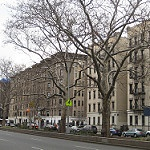

1/1 [==============================] - 0s 30ms/step
It is a building.


In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = loaded_model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
if input_pred_label == 0:
  print ('It is a sea.')
elif input_pred_label == 1:
  print ('It is a forest.')
elif input_pred_label == 2:
  print ('It is a building.')
elif input_pred_label == 3:
  print ('It is a glacier.')